<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Statistical_Analysis_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Statistical Analysis**

## Question 1

> Calculate a 95 percent confidence interval for the “Gross output – Year 3 (Rs)”

In [ ]:
#Importing the standard Python Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [ ]:
#Reading the csv file for group 4
df = pd.read_csv('SA1_Group_4.csv')

<ipython-input-2-0861a5ec1572>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SA1_Group_4.csv')


In [ ]:
#Understanding the information about csv file we have uploaded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             10000 non-null  int64 
 1   SL_NO             10000 non-null  object
 2   ST_CODE           10000 non-null  int64 
 3   DIST_CODE         10000 non-null  int64 
 4   TTM_CODE          10000 non-null  object
 5   SECTOR_CODE       10000 non-null  int64 
 6   VT_CODE           10000 non-null  object
 7   WORKED_FOR_1D     10000 non-null  int64 
 8   CLOSED_Y          10000 non-null  object
 9   OPER_DUR_MM       10000 non-null  int64 
 10  OPER_DUR_DD       10000 non-null  object
 11  SURVEY_CODE       10000 non-null  int64 
 12  NIC_CODE          10000 non-null  int64 
 13  PERM_REG_Y        10000 non-null  object
 14  FACTORY_ACT       10000 non-null  int64 
 15  INIT_PROD_Y       10000 non-null  object
 16  UNIT_TYPE         10000 non-null  int64 
 17  ANCI_UNIT    

In [ ]:
#Converting the GOP_Year1 data type from 'object' to 'int64'
GOP_Year_one = pd.to_numeric(df['GOP_Year1'], errors='coerce').astype('Int64')

In [ ]:
#We are concerned about GOP_Year3 column. So, selecting GOP_Year3 column only for our Analysis
df_required = df['GOP_Year3']
df_required

,GOP_Year3
0,10000
1,284500
2,81050
3,44000
4,42000
...,...
9995,35000
9996,243500
9997,300000
9998,10000


<Axes: ylabel='GOP_Year3'>

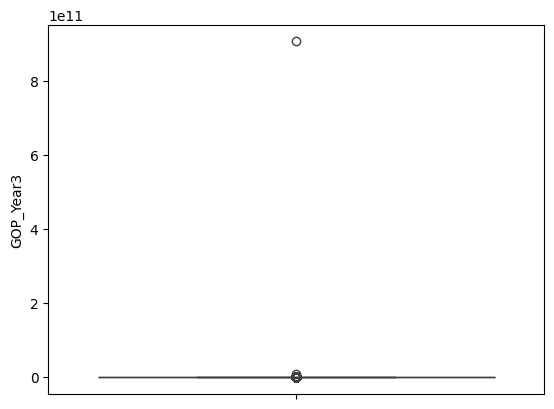

In [ ]:
#Understanding the distribution values using box plot
#Box plot is an univariant analysis used to analyze the single variable
sns.boxplot(df_required)


In [ ]:
#From the box plot above it is clear that there are outliers in the positive direction and distribution is right skewed heavily
#Removing the outliers in the positive direction which is 1.5*IQR
Q3 = df_required.quantile(0.75) # This line was indented, now fixed
Q1 = df_required.quantile(0.25) # This line was indented, now fixed
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower limit is:",lower_limit)
print("Upper limit is:",upper_limit)


Lower limit is: -445125.0
Upper limit is: 865875.0


In [ ]:
# Calculate the 0.5th and 99.5th percentiles
lower_bound = df_required.quantile(0.005)
upper_bound = df_required.quantile(0.995)

# Filter the data to remove outliers
df_filtered_Year3 = df_required[(df_required >= lower_bound) & (df_required <= upper_bound)]

# Now df_filtered_Year3 contains the data with the top and bottom 0.5% removed


In [ ]:
#Now let's caluculate the required parameters
confidence_interval = 0.95
DOF = len(df_filtered_Year3)-1
#As we don't have Standard Deviation let's use t value rather than Z value
#Calculating t value using the formula
t_value = -t.ppf(1-((1-confidence_interval)/2),DOF)
mean = np.mean(df_filtered_Year3)
std = np.std(df_filtered_Year3)
Standard_Error = std/np.sqrt(len(df_filtered_Year3))
Marin_Of_Error = t_value*Standard_Error
Lower_Limit = mean - Marin_Of_Error
Upper_Limit = mean + Marin_Of_Error
print(f"Range of values for 95% confidence interval is:{round(Lower_Limit,2)},{round(Upper_Limit,2)}")

Range of values for 95% confidence interval is:1183093.11,1010345.79


##Question 2

> Define two different measures that you consider most appropriate for measuring the performance of the units. This definition is up to you. These can be the variables that are already in the data or new variables defined based on the existing variables. For example, you can define a metric “Gross output per employee” by dividing the gross output of the year by the total number of employees. Please explain in one paragraph why you have selected these two measures and why you think they are most appropriate. Remaining analysis is
to be carried out based on these definitions

The two parameters considered for the analysis are;
1. GOP_Year3 Growth = (GOP_Year3/GOP_Year1)^0.5 - 1
2. GOP on Asset Invested = GOP_Year3/Original Purchase value in Year 3

## Question 3


> Calculate 99% confidence interval for the population mean for each of the two
metrics defined by you. Interpret these confidence intervals in terms of their
relevance to the management.




In [ ]:
#Removing the top 0.5% and bottom 0.5% datapoints in the columns GOP_Year1 and also in Original Purchase value in Year3
lower_limit = GOP_Year_one.quantile(0.005)
upper_limit = GOP_Year_one.quantile(0.995)
df_filtered_Year1 = df[(GOP_Year_one >= lower_limit) & (GOP_Year_one <= upper_limit)]
#Removing outliers in original purchase value of assests
lower_limit = df['ORI_PURC_VAL_PM'].quantile(0.005)
upper_limit = df['ORI_PURC_VAL_PM'].quantile(0.995)
df_filtered_ORI = df[(df['ORI_PURC_VAL_PM'] >= lower_limit) & (df['ORI_PURC_VAL_PM'] <= upper_limit)]
#Calculating the two required metrics
df_filtered_Year3_Growth = (df_filtered_Year3/df_filtered_Year1)**0.5 - 1
df_filtered_Asset_Invested = df_filtered_Year3/df_filtered_ORI

In [ ]:
#Now calculating the Limits with 99% Confidence Interval using t distributon
confidence_interval = 0.99
mean =